Before you turn this assignment in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Lastly, hit **Validate**.

If you worked locally, and then uploaded your work to the hub, make sure to follow these steps:
- open your uploaded notebook **on the hub**
- hit the validate button right above this cell, from inside the notebook

These  steps should solve any issue related to submitting the notebook on the hub.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

# Lab 4: Plotting, smoothing, transformation

## Course Policies

Here are some important course policies. These are also located at
http://www.ds100.org/sp18/.

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your solution.


## Due Date

This assignment is due at 11:59pm Monday, February 12th. Instructions for submission are on the website.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

plt.style.use('fivethirtyeight') # Use plt.style.available to see more styles
sns.set()
sns.set_context("talk")
%matplotlib inline

## Objectives for Lab 4:

In this lab you will get some practice plotting, applying data transformations, and working with kernel density estimators.  We will be working with data from the world bank containing various statistics for countries and territories around the world.  

## Question 0

We will again need the `fetch_and_cache` utility.
Import it from `utils.py` (attached with this assignment) or redefine it below.

In [3]:
from utils import fetch_and_cache 

In [4]:
# This checks whether you imported/defined fetch_and_cache
import types
assert type(fetch_and_cache) == types.FunctionType

In [5]:
data_url = 'http://www.ds100.org/sp18/assets/datasets/lab04_data.zip'
file_name = 'lab04_data.zip'

dest_path = fetch_and_cache(data_url=data_url, file=file_name)
print(f'Located at {dest_path}')

[##########################################]
Downloaded lab04_data.zip!
MD5 hash of file: 9a337ebcb37beec258bb1b39022ddfdb
Located at data/lab04_data.zip


Here, the ZIP archive contains a data folder with a few files in it. This is similar to what you had in lab 3.

To get the CSV files we want to work with, directly extract the data folder in the zip archive in the **current working directory**, which is denoted with the `.` in the cell below.

In [6]:
my_zip = zipfile.ZipFile(dest_path, 'r')
# Note the '.' argument
my_zip.extractall('.')

Now, let us load some world bank data into a pandas.DataFrame object named ```wb```.

In [7]:
wb = pd.read_csv("data/world_bank_misc.csv", index_col=0)
wb.head()

Primary completion rate: Male: % of relevant age group: 2015  \
Afghanistan                                                   NaN              
Albania                                                     108.0              
Algeria                                                     106.0              
American Samoa                                                NaN              
Andorra                                                       NaN              

                Primary completion rate: Female: % of relevant age group: 2015  \
Afghanistan                                                   NaN                
Albania                                                     105.0                
Algeria                                                     105.0                
American Samoa                                                NaN                
Andorra                                                       NaN                

                Lower secondary completion rate: Male: % of relevant age group: 2015  \
Afghanistan                                                   NaN                      
Albania                                                      97.0                      
Algeria                                                      68.0                      
American Samoa                                                NaN                      
Andorra                                                       NaN                      

                Lower secondary completion rate: Female: % of relevant age group: 2015  \
Afghanistan                                                   NaN                        
Albania                                                      97.0                        
Algeria                                                      85.0                        
American Samoa                                                NaN                        
Andorra                                                       NaN                        

                Youth literacy rate: Male: % of ages 15-24: 2005-14  \
Afghanistan                                                  62.0     
Albania                                                      99.0     
Algeria                                                      96.0     
American Samoa                                                NaN     
Andorra                                                       NaN     

                Youth literacy rate: Female: % of ages 15-24: 2005-14  \
Afghanistan                                                  32.0       
Albania                                                      99.0       
Algeria                                                      92.0       
American Samoa                                                NaN       
Andorra                                                       NaN       

                Adult literacy rate: Male: % ages 15 and older: 2005-14  \
Afghanistan                                                  45.0         
Albania                                                      98.0         
Algeria                                                      83.0         
American Samoa                                                NaN         
Andorra                                                       NaN         

                Adult literacy rate: Female: % ages 15 and older: 2005-14  \
Afghanistan                                                  18.0           
Albania                                                      96.0           
Algeria                                                      68.0           
American Samoa                                                NaN           
Andorra                                                       NaN           

                Students at lowest proficiency on PISA: Mathematics: % of 15 year-olds: 2015  \
Afghanistan                                                   NaN                              


This table contains some interesting columns.  Take a look:

In [8]:
list(wb.columns)

['Primary completion rate: Male: % of relevant age group: 2015',
 'Primary completion rate: Female: % of relevant age group: 2015',
 'Lower secondary completion rate: Male: % of relevant age group: 2015',
 'Lower secondary completion rate: Female: % of relevant age group: 2015',
 'Youth literacy rate: Male: % of ages 15-24: 2005-14',
 'Youth literacy rate: Female: % of ages 15-24: 2005-14',
 'Adult literacy rate: Male: % ages 15 and older: 2005-14',
 'Adult literacy rate: Female: % ages 15 and older: 2005-14',
 'Students at lowest proficiency on PISA: Mathematics: % of 15 year-olds: 2015',
 'Students at lowest proficiency on PISA: Reading: % of 15 year-olds: 2015',
 'Students at lowest proficiency on PISA: Science: % of 15 year-olds: 2015',
 'Population: millions: 2016',
 'Surface area: sq. km thousands: 2016',
 'Population density: people per sq. km: 2016',
 'Gross national income, Atlas method: $ billions: 2016',
 'Gross national income per capita, Atlas method: $: 2016',
 'Purchasin

# Part 1: Scaling

In the first part of this assignment we will be scaling the data to linearize visualizations.


## Question 1:

Extract the fields corresponding to the **adult literacy rate in Female ages 15 and older for 2005-14** and the **gross national income per capita (atlas method)** into a new dataframe.  Then drop any rows that are missing values.

In [11]:
df = pd.DataFrame(index=wb.index)
df['lit'] = wb["Adult literacy rate: Female: % ages 15 and older: 2005-14"]
df['inc'] = wb["Gross national income per capita, Atlas method: $: 2016"]


df.dropna(inplace=True)
print("Original records:", len(wb))
print("Final records:", len(df))

Original records: 216
Final records: 147


In [12]:
assert np.isclose(df['lit'].mean(),78.435, rtol=0.01)
assert np.isclose(df['inc'].mean(),7919.251, rtol=0.01)

In [13]:
df.head()

lit      inc
Afghanistan          18.0    580.0
Albania              96.0   4250.0
Algeria              68.0   4270.0
Angola               60.0   3440.0
Antigua and Barbuda  99.0  13400.0

## Question 2a:

Use the seaborn `distplot` tool to construct histograms for the adult literacy data and the income data:

/home/sean/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/sean/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Gross national income per capita, Atlas method: $: 2016')

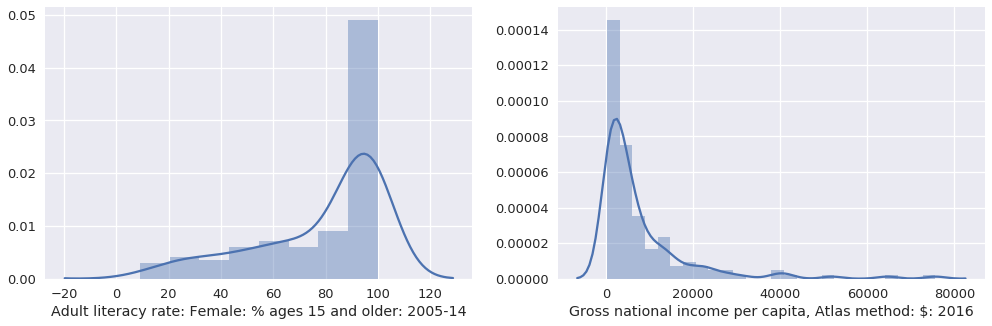

In [15]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)

sns.distplot(df.lit)

plt.xlabel("Adult literacy rate: Female: % ages 15 and older: 2005-14")



plt.subplot(1,2,2)

sns.distplot(df.inc)

plt.xlabel('Gross national income per capita, Atlas method: $: 2016')


## Question 2b

One of the above plots could benefit from a log transformation.  Which one?

In [16]:
needs_log_transformation = "inc"

In [17]:
# Do not modify this cell

## Question 2c

Remake the appropriate plot with the data transformed using `log10`. Be sure to correct the axis label:

/home/sean/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


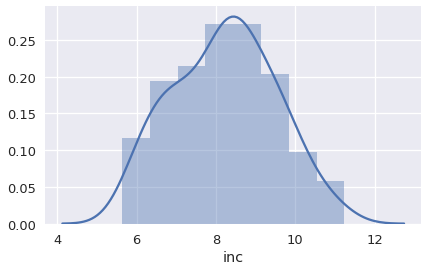

In [19]:
plt.figure()

sns.distplot(np.log(df.inc))

# Part 2: Kernel Density Estimation

In this part of the lab you will implement a kernel density estimator.


Let's implement our own version of the KDE plot above.  Below we give you the Guassian Kernel function

$$\Large
K_\alpha(x, z) = \frac{1}{\sqrt{2 \pi \alpha^2}} \exp\left(-\frac{(x - z)^2}{2  \alpha ^2} \right)
$$

In [20]:
def gaussian_kernel(alpha, x, z):
    return 1.0/np.sqrt(2. * np.pi * alpha**2) * np.exp(-(x - z) ** 2 / (2.0 * alpha**2))

## Question 3a
Implement the KDE function which computes:

$$\Large
f_\alpha(x) = \frac{1}{n} \sum_{i=1}^n K_\alpha(x, z_i)
$$

Where $z_i$ are the data and $\alpha$ is a parameter to control the smoothness

In [25]:
def kde(kernel, alpha, x, data):
    """
    Compute the kernel density estimate for the single query point x.

    Args:
        kernel: a kernel function with 3 parameters: alpha, x, data
        alpha: the smoothing parameter to pass to the kernel
        x: a single query point (in one dimension)
        data: a numpy array of data points

    Returns:
        The smoothed estimate at the query point x
    """
    ...
    
    return np.mean(kernel(alpha, x, data))

In [26]:
assert np.isclose(kde(gaussian_kernel, 1.0, 2.0, np.array([3.0, 4.0, 5.0, 7.0])), 0.075099)

## Question 3b
Create two new columns `trans_lit` and `trans_inc` that transform the `lit` and `inc` columns using `log10`. This should be similar to what you did in Question 2c.


In [27]:
df['trans_lit'] = np.log10(df['lit']) 
df['trans_inc'] = np.log10(df['inc'])

In [28]:
assert np.isclose(np.corrcoef(df['trans_lit'], df['trans_inc'])[0,1], 0.67196)

Now let's test your function to generate a plot. You may find the ```np.linspace``` function helpful when plotting the KDE curve.

/home/sean/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


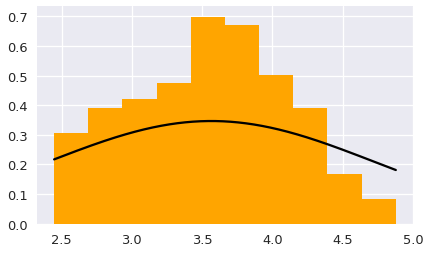

In [29]:
alpha = 1.0
xs = np.linspace(df['trans_inc'].min(), df['trans_inc'].max(), 1000)
curve = [kde(gaussian_kernel, alpha, x, df['trans_inc']) for x in xs]
plt.hist(df['trans_inc'], normed=True, color='orange')
plt.plot(xs, curve, 'k-')

## Question 3c

Let's see what happens as we vary alpha.  Plot alpha values in (0.2, 0.4, ..., 1.6, 1.8) on a 3x3 grid. Title each subplot with "alpha = &lt;value&gt;".

Hint: Take a look at the `plt.subplot` function to help create the grid

/home/sean/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/sean/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/sean/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/sean/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/sean/anaconda3/lib/python3.6/site-pack

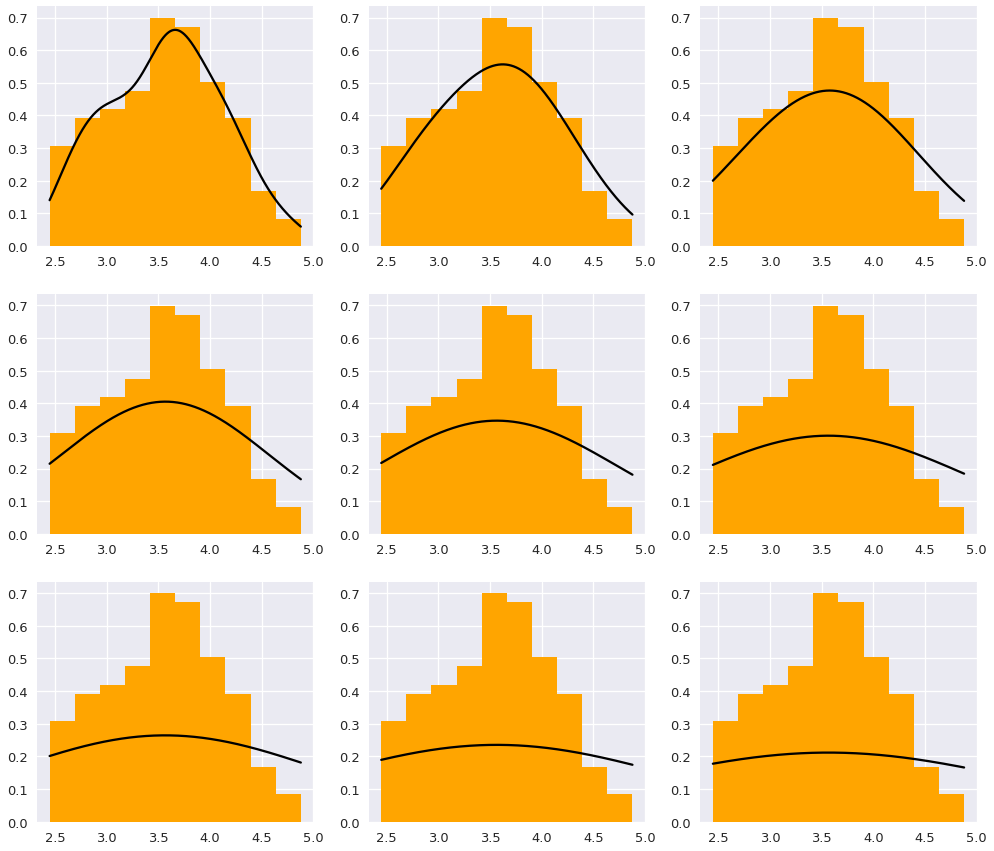

In [37]:
plt.figure(figsize=(15,15))
alphas = [i * 0.2 for i in np.arange(1, 10)]
for i, alpha in enumerate(alphas):
    plt.subplot(3, 3, i + 1)
    xs = np.linspace(df['trans_inc'].min(), df['trans_inc'].max(), 1000)
    curve = [kde(gaussian_kernel, alpha, x, df['trans_inc']) for x in xs]
    plt.hist(df['trans_inc'], normed=True, color='orange')
    plt.plot(xs, curve, 'k-')
plt.show()


How does increasing alpha affect the curves? Explain any pattern/trend you see in the cell below. 

YOUR ANSWER HERE

## Question 3d

We can also try other kernel functions such as the [boxcar kernel](https://en.wikipedia.org/wiki/Boxcar_function).


In [38]:
def boxcar_kernel(alpha, x, z):
    return (((x-z)>=-alpha/2)&((x-z)<=alpha/2))/alpha

Run the cell below to enable interactive plots. It should give you a green 'OK' when it's finished.

In [39]:
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


Now, we can plot the kernel function to see what it looks like.

In [40]:
x = np.linspace(-10,10,1000)
def f(alpha):
    plt.plot(x, boxcar_kernel(alpha,x,0), label='Boxcar')
    plt.plot(x, gaussian_kernel(alpha,x,0), label='Gaussian')
    plt.legend(title='Kernel Function')
    plt.show()
interact(f, alpha=(1,10,0.1))

interactive(children=(FloatSlider(value=5.0, description='alpha', max=10.0, min=1.0), Output()), _dom_classes=…

<function __main__.f(alpha)>

Using the interactive plot below compare the the two kernel techniques:  (Generating the KDE plot is slow, so you may expect some latency after you move the slider)

In [41]:
xs = np.linspace(df['trans_inc'].min(), df['trans_inc'].max(), 1000)
def f(alpha_g, alpha_b):
    plt.hist(df['trans_inc'], normed=True, color='orange')
    g_curve = [kde(gaussian_kernel, alpha_g, x, df['trans_inc']) for x in xs]
    plt.plot(xs, g_curve, 'k-', label='Gaussian')
    b_curve = [kde(boxcar_kernel, alpha_b, x, df['trans_inc']) for x in xs]
    plt.plot(xs, b_curve, 'r-', label='Boxcar')
    plt.legend(title='Kernel Function')
    plt.show()
interact(f, alpha_g=(0.01,.5,0.01), alpha_b=(0.01,3,0.1))

interactive(children=(FloatSlider(value=0.25, description='alpha_g', max=0.5, min=0.01, step=0.01), FloatSlide…

<function __main__.f(alpha_g, alpha_b)>

How is the boxcar kde plot comparing to previous plot using the gaussian kernel?

YOUR ANSWER HERE

**Congrats! You are finished with this assignment. Don't forget to validate & submit before 11:59PM!**